Running Spend Analytics API simulation...
{'total_spend': 1400.0, 'total_conversions': 460, 'cost_per_conversion': 3.0434782608695654, 'attribution_scores': {'Social Media': 35.714285714285715, 'Email': 21.428571428571427, 'SEO': 14.285714285714285, 'Paid Ads': 28.57142857142857}, 'plot_image': <starlette.responses.StreamingResponse object at 0x000002182C41BE90>}


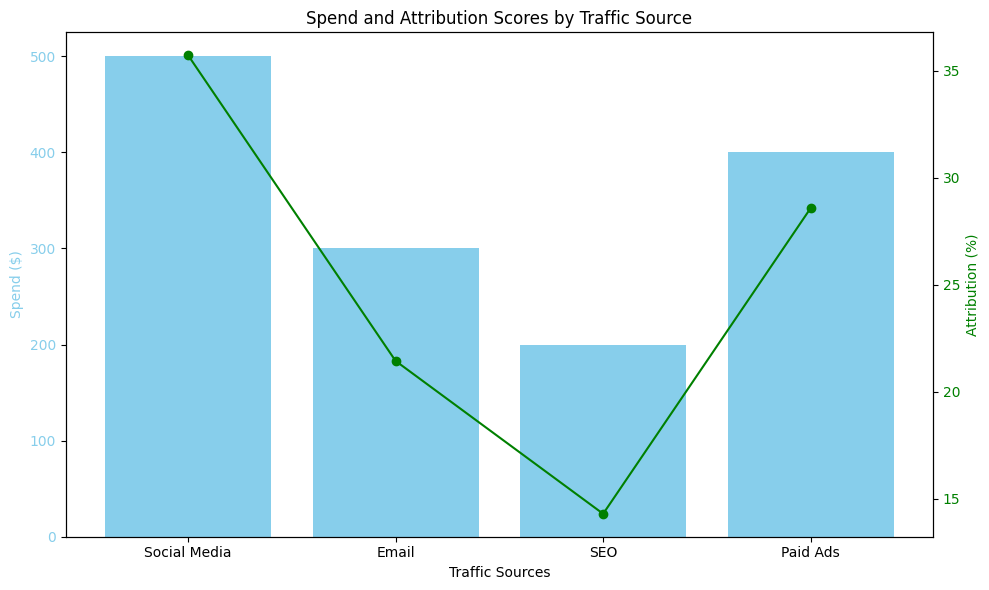

In [2]:
# API Development and Spend Analytics 

from fastapi import FastAPI
from pydantic import BaseModel
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import io
from fastapi.responses import StreamingResponse

# Create the FastAPI app instance
app = FastAPI()

# 1. Define a Pydantic model for the API input
class SpendData(BaseModel):
    traffic_source: str
    spend: float  # Amount spent on this traffic source
    conversions: int  # Number of conversions from this source

# 2. Sample spend analytics data for testing (mocked for GitHub)
spend_data = [
    {"traffic_source": "Social Media", "spend": 500.0, "conversions": 100},
    {"traffic_source": "Email", "spend": 300.0, "conversions": 150},
    {"traffic_source": "SEO", "spend": 200.0, "conversions": 120},
    {"traffic_source": "Paid Ads", "spend": 400.0, "conversions": 90}
]

# 3. Define an endpoint to accept spend data and return analytics
@app.post("/spend-analytics/")
def get_spend_analytics(data: List[SpendData]):
    total_spend = sum(item.spend for item in data)
    total_conversions = sum(item.conversions for item in data)
    
    # Apply basic spend analytics: Cost per Conversion (CPC)
    cpc = total_spend / total_conversions if total_conversions else 0
    
    # Attribution model based on spend proportion
    attribution_scores = {}
    for item in data:
        attribution_scores[item.traffic_source] = (item.spend / total_spend) * 100  # Percentage based on spend
    
    # Generate and return the plot for spend distribution and attribution scores
    plot_image = plot_spend_attribution(data, attribution_scores)

    return {
        "total_spend": total_spend,
        "total_conversions": total_conversions,
        "cost_per_conversion": cpc,
        "attribution_scores": attribution_scores,
        "plot_image": plot_image  # Provide the plot as a URL or path
    }

# 4. Marketing Attribution Model (based on traffic sources and spend data)
def marketing_attribution_model():
    traffic_sources = ['Social Media', 'Email', 'SEO', 'Paid Ads']
    spend = [500, 300, 200, 400]  # Example spend values for each traffic source
    conversions = [100, 150, 120, 90]  # Example conversion counts for each traffic source
    
    attribution_scores = {}
    total_spend = sum(spend)
    total_conversions = sum(conversions)
    
    # Attribution based on spend proportion
    for source, s, c in zip(traffic_sources, spend, conversions):
        attribution_scores[source] = (s / total_spend) * 100  # Percentage of total spend
        # Optional: Add cost per conversion (CPC) as part of the attribution model
        attribution_scores[source] += (s / c) if c else 0  # Cost per Conversion
    
    return attribution_scores

# 5. Function to plot spend and attribution
def plot_spend_attribution(spend_data, attribution_scores):
    # Prepare data for plotting
    sources = [item.traffic_source for item in spend_data]
    spend_values = [item.spend for item in spend_data]
    attribution_values = [attribution_scores[source] for source in sources]

    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot the spend data
    ax1.bar(sources, spend_values, color='skyblue', label='Spend ($)')
    ax1.set_xlabel('Traffic Sources')
    ax1.set_ylabel('Spend ($)', color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')

    # Create a second y-axis to plot the attribution data
    ax2 = ax1.twinx()
    ax2.plot(sources, attribution_values, color='green', marker='o', label='Attribution (%)')
    ax2.set_ylabel('Attribution (%)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Title and labels
    ax1.set_title('Spend and Attribution Scores by Traffic Source')

    # Save the plot to a BytesIO object and return as StreamingResponse
    buf = io.BytesIO()
    plt.tight_layout()
    plt.savefig(buf, format='png')
    buf.seek(0)
    return StreamingResponse(buf, media_type="image/png")

# 6. Simulate an API call for the marketing attribution model
@app.get("/simulate-marketing-attribution/")
def simulate_marketing_attribution():
    attribution = marketing_attribution_model()
    return {"Marketing Attribution": attribution}

# 7. Run a simple simulation of the spend analytics API with mock data
def simulate_spend_analytics():
    # Simulate calling the spend analytics API
    response = get_spend_analytics(data=[
        SpendData(traffic_source="Social Media", spend=500.0, conversions=100),
        SpendData(traffic_source="Email", spend=300.0, conversions=150),
        SpendData(traffic_source="SEO", spend=200.0, conversions=120),
        SpendData(traffic_source="Paid Ads", spend=400.0, conversions=90),
    ])
    print(response)

# 8. Main execution for local testing (this would be removed or replaced in production)
if __name__ == "__main__":
    print("Running Spend Analytics API simulation...")
    simulate_spend_analytics()
